![Banner challenge](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/banner1TelecomX_readme.png)


##üìå Bibliotecas.

In [69]:
%%capture
!pip install -U plotly kaleido

In [70]:
import pandas as pd
import requests
from pandas import json_normalize
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
##Para utilizar imagen de repositorio.
import urllib.request
from PIL import Image


---

#üíæ  **Extracci√≥n de Datos.**



![imagen banner extracci√≥n de datos](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/Banner%20Extracci%C3%B3n%20de%20datos.png)

In [71]:
url = "https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [72]:
!pip install mplcursors

---
#üß∞ **Transformaci√≥n.**

![Banner secci√≥n transformaci√≥n](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/Banner%20transformacion%20de%20datos.png)

##üìå **Diccionario de Datos.**


*   customerID: n√∫mero de identificaci√≥n √∫nico de cada cliente
*   Churn: si el cliente dej√≥ o no la empresa
*   gender: g√©nero (masculino y femenino)
*   SeniorCitizen: informaci√≥n sobre si un cliente tiene 65 a√±os o m√°s
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripci√≥n de servicio telef√≥nico
*   MultipleLines: suscripci√≥n a m√°s de una l√≠nea de tel√©fono
*   InternetService: suscripci√≥n a un proveedor de internet
*   OnlineSecurity: suscripci√≥n adicional de seguridad online
*   OnlineBackup: suscripci√≥n adicional de backup online
*   DeviceProtection: suscripci√≥n adicional de protecci√≥n en el dispositivo
*   TechSupport: suscripci√≥n adicional de soporte t√©cnico, menos tiempo de espera
*   StreamingTV: suscripci√≥n de TV por cable
*   StreamingMovies: suscripci√≥n de streaming de pel√≠culas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

##üõ†Ô∏è **Normalizaci√≥n de Columnas.**

In [73]:
df_telecomX_normalizado = pd.json_normalize(data)
df_telecomX_normalizado.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

##üõ†Ô∏è **Identificaci√≥n de Inconsistencias en Datos.**

In [74]:
# C√≥digo para Verificaci√≥n de Valores √önicos por Columna.
print(f"üìùResumen para Verificaci√≥n de Valores √önicos por Columna.\n")
for col in df_telecomX_normalizado.columns:
  print(f"üü£ Columna: '{col}': {df_telecomX_normalizado[col].nunique()}\n")

  if df_telecomX_normalizado[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(f"\t‚úèÔ∏è valores = {df_telecomX_normalizado[col].unique()}\n")
  print('-' * 50)  # L√≠nea divisoria para mejor visualizaci√≥n

üìùResumen para Verificaci√≥n de Valores √önicos por Columna.

üü£ Columna: 'customerID': 7267

--------------------------------------------------
üü£ Columna: 'Churn': 3

	‚úèÔ∏è valores = ['No' 'Yes' '']

--------------------------------------------------
üü£ Columna: 'customer.gender': 2

	‚úèÔ∏è valores = ['Female' 'Male']

--------------------------------------------------
üü£ Columna: 'customer.SeniorCitizen': 2

	‚úèÔ∏è valores = [0 1]

--------------------------------------------------
üü£ Columna: 'customer.Partner': 2

	‚úèÔ∏è valores = ['Yes' 'No']

--------------------------------------------------
üü£ Columna: 'customer.Dependents': 2

	‚úèÔ∏è valores = ['Yes' 'No']

--------------------------------------------------
üü£ Columna: 'customer.tenure': 73

--------------------------------------------------
üü£ Columna: 'phone.PhoneService': 2

	‚úèÔ∏è valores = ['Yes' 'No']

--------------------------------------------------
üü£ Columna: 'phone.MultipleLines': 3

	‚ú

In [75]:
# Verificando si hay duplicados
print(f"üìù Resumen de Verificaci√≥n de Datos duplicados y N√∫los.\n")
duplicados = df_telecomX_normalizado.duplicated().sum()
print(f"üü£ N√∫mero de l√≠neas duplicadas:\n")

if  duplicados:
    print(f"\tüî∏{duplicados}")
else:
    print("   ‚úÖ No hay registros duplicados.")


# Verificando si hay valores Nulos
valores_nulos = df_telecomX_normalizado.isnull().sum()
valores_nulos.name = 'Valores Nulos'
valores_nulos_filtrados = valores_nulos[valores_nulos > 0]

print(f"\nüü£ Valores nulos por columna:\n")
if not valores_nulos_filtrados.empty:
    for columna, cantidad in valores_nulos_filtrados.items():
        print(f"\tüî∏ {columna}: {cantidad}")
else:
    print("   ‚úÖ No hay columnas con datos nulos.\n")
    display(valores_nulos)


üìù Resumen de Verificaci√≥n de Datos duplicados y N√∫los.

üü£ N√∫mero de l√≠neas duplicadas:

   ‚úÖ No hay registros duplicados.

üü£ Valores nulos por columna:

   ‚úÖ No hay columnas con datos nulos.



customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
Name: Valores Nulos, dtype: int64

In [76]:
#c√≥digo para calcular valores sin registro
valores_blanco_vacio = df_telecomX_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
valores_blanco_vacio.name = 'Registro en blanco'
print("\nüìù Resumen para Registros en Blanco por Columna.\n")
display(valores_blanco_vacio)


üìù Resumen para Registros en Blanco por Columna.



customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
Name: Registro en blanco, dtype: int64

In [77]:
df_telecomX_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [78]:
#1. Columna 'SeniorCitizen'(0,1)(objet)Se puede convertir sus valores a 'Yes' o 'No'
#2. Columnas 'Contract y 'PaymentMethod' podr√≠amos unir palabras por un guion (-) para tokenizar
#3. Columna 'PaymentMethod' remover (), reemplazar espacios por guion.
#4. Columna 'Charges.Total' convertir a tipo float64.
#5. Columnas 'Churn' ''
#6. Tratamiento preventivo para columnas tipo texto: Remover espacios al inicio y final,convertimos a min√∫scula, removemos valores nulos por desconocido.
#7. Tratamiento preventivo para columnas con caracteres numericos y conversi√≥n tipo float64.

##üõ†Ô∏è **Manejo de Inconsistencias en Datos.**

In [79]:
#Tratamiento m√≠nimo para columnas tipo cadena de texto.
#Remover espacios al inicio y final,convertimos a min√∫scula, removemos valores nulos por desconocido.
df_telecomX_normalizado = df_telecomX_normalizado.apply(lambda x: x.astype(str).str.lower())

In [80]:
#Retornamos formato de id_cliente.
df_telecomX_normalizado['customerID'] = df_telecomX_normalizado['customerID'].astype(str).str.upper()

In [81]:
#Columnas 'Contract y 'PaymentMethod' podr√≠amos unir palabras por un guion (-) para tokenizar.
#Son las columnas cuyos registros deseamos unir con un guion.
columnas_espacios = ['account.Contract','account.PaymentMethod','internet.InternetService']
for col in columnas_espacios:
  df_telecomX_normalizado[col] = df_telecomX_normalizado[col].str.replace(' ','-')

In [82]:
#Columna 'Charges.Monthly','Charges.Total' Limpieza preventiva de caracteres menos numericos y el punto.
columnas_numericas = ['account.Charges.Monthly','account.Charges.Total']
for col in columnas_numericas:
  df_telecomX_normalizado[col] = pd.to_numeric(df_telecomX_normalizado[col].astype(str).str.replace(r'[^0-9.]','', regex=True), errors='coerce')

In [83]:
# Eliminar filas vacias en columna 'Churn'
df_telecomX_limpio = df_telecomX_normalizado[df_telecomX_normalizado['Churn'].str.strip() != ''].copy()
df_telecomX_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   object 
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   object 
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [84]:
# Vac√≠os o en blanco
conteo_vacios = df_telecomX_limpio.apply(lambda x: x.astype(str).str.strip() == '').sum()

###üõ†Ô∏è **Cuentas Diarias.**

In [85]:
#Creo columna Cuentas_diarias.
df_telecomX_limpio['Cuentas_diarias'] = df_telecomX_limpio['account.Charges.Monthly']/30
df_telecomX_limpio['Cuentas_diarias']

0       2.186667
1       1.996667
2       2.463333
3       3.266667
4       2.796667
          ...   
7262    1.838333
7263    2.836667
7264    1.676667
7265    2.261667
7266    1.966667
Name: Cuentas_diarias, Length: 7043, dtype: float64

In [86]:
columna_chargesM_cuenta_diaria = df_telecomX_limpio[['account.Charges.Monthly','Cuentas_diarias']].isna().sum()
print(columna_chargesM_cuenta_diaria)


account.Charges.Monthly    0
Cuentas_diarias            0
dtype: int64


###üõ†Ô∏è **Estandarizaci√≥n y Transformaci√≥n de Datos.**

####üî® **Para An√°lisis Exploratorio.**

In [87]:
#Traducci√≥n de columnas.
df_telecomX_limpio.columns = ['id_cliente','evasion','genero','a_mayor','pareja','dependientes','antiguedad','telefonia',
              'multilinea','internet','seguridad','respaldo','proteccion','soporte','tv','peliculas','contrato',
              'factura_online','m_pago','cargo_mensual','cargo_total','cuenta_diaria']


In [88]:
#Transformamos valores binarios solo para an√°lisis exploratorio.
df_telecomX_limpio['a_mayor'] = df_telecomX_limpio['a_mayor'].replace({'1':'si','0':'no'})
df_telecomX_limpio['a_mayor']

0       no
1       no
2       no
3       si
4       si
        ..
7262    no
7263    no
7264    no
7265    no
7266    no
Name: a_mayor, Length: 7043, dtype: object

In [89]:
#Traduccion de texto al espa√±ol.
columnas_datos_si_internet= ['evasion','pareja','dependientes','telefonia','multilinea','internet','seguridad','respaldo','proteccion','soporte','tv','peliculas','factura_online']
for col in columnas_datos_si_internet:
  df_telecomX_limpio[col] = df_telecomX_limpio[col].replace({'yes':'si','No internet service':'no-aplica'})

#Traduccion en columna contrato.
df_telecomX_limpio['contrato'] = df_telecomX_limpio['contrato'].replace({'one-year':'anual','month-to-month':'mensual','two-year':'bianual'})
#Traduccion en columna m_pago.
df_telecomX_limpio['m_pago'] = df_telecomX_limpio['m_pago'].replace({'mailed-check':'cheque-por-correo','electronic-check':'cheque-electronico','credit-card-(automatic)':'cargo-automatico-tc',
                                                                  'bank-transfer-(automatic)':'cargo-automatico-cta-bancaria'})

In [90]:
display(df_telecomX_limpio.head(2))

id_cliente evasion  genero a_mayor pareja dependientes antiguedad  \
0  0002-ORFBO      no  female      no     si           si          9   
1  0003-MKNFE      no    male      no     no           no          9   

  telefonia multilinea internet  ... proteccion soporte  tv peliculas  \
0        si         no      dsl  ...         no      si  si        no   
1        si         si      dsl  ...         no      no  no        si   

  contrato factura_online             m_pago cargo_mensual cargo_total  \
0    anual             si  cheque-por-correo          65.6       593.3   
1  mensual             no  cheque-por-correo          59.9       542.4   

   cuenta_diaria  
0       2.186667  
1       1.996667  

[2 rows x 22 columns]

####üîß **Para Modelado.**

In [91]:
"""
#Cambio a datos binarios.
col_dato_binario = ['desersion','pareja','dependientes','telefonia','factura_online']
for col in col_dato_binario:
  df_telecomX_limpio[col] = df_telecomX_limpio[col].replace({'yes': 1, 'no': 0}).astype('int64')

  print(f"‚úÖ {df_telecomX_limpio[col].value_counts(dropna=False)}\n")
"""
print()

---

#üìä **Carga y an√°lisis.**

![Banner secci√≥n carga y an√°lisis](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/banner%20carga%20y%20an%C3%A1lisis.png)

##‚úèÔ∏è **An√°lisis Descriptivo.**
--

* Hay 11 registros en cargo_total que no aparecen en las otras columnas.

* Se recomienda verificar de qu√© manera puede recalcularse el valor de esos registros faltantes. Por ejemplo, si el contrato es mensual, es posible que el cargo_total coincida con el cargo_mensual.

In [92]:
display(df_telecomX_limpio.describe())

cargo_mensual  cargo_total  cuenta_diaria
count    7043.000000  7032.000000    7043.000000
mean       64.761692  2283.300441       2.158723
std        30.090047  2266.771362       1.003002
min        18.250000    18.800000       0.608333
25%        35.500000   401.450000       1.183333
50%        70.350000  1397.475000       2.345000
75%        89.850000  3794.737500       2.995000
max       118.750000  8684.800000       3.958333

üü£ **Interpretar la Distribuci√≥n.**

* Si mean ‚âà 50%, podr√≠as estar frente a una distribuci√≥n sim√©trica.

* Si mean > 50%, distribuci√≥n sesgada a la izquierda (cola larga hacia la izquierda).

* Si mean < 50%, distribuci√≥n sesgada a la derecha (cola larga hacia la derecha).

üü£ **Rango y dispersi√≥n.**

* max - min: te da el rango total de valores.

* std: cuanto mayor sea, m√°s dispersos est√°n los datos respecto al promedio.

* Si std es muy grande respecto a la mean, indica alta variabilidad.

üü£ Cuartiles.

* Puedes ver la concentraci√≥n de los datos:

* Si Q3 - Q1 (llamado rango intercuart√≠lico) es peque√±o: los datos est√°n m√°s concentrados.

* Si es grande: hay alta dispersi√≥n entre el 25% y el 75% central de los datos.

**Escala de Apreciaci√≥n del Coeficiente de Variaci√≥n.**


| CV (%)        | Nivel de dispersi√≥n | Descripci√≥n sugerida                                            |
| ------------- | ------------------- | --------------------------------------------------------------- |
| **0% ‚Äì 15%**  | Muy baja dispersi√≥n | Los datos son altamente homog√©neos. Muy poca variaci√≥n.         |
| **15% ‚Äì 30%** | Baja dispersi√≥n     | Los datos son bastante consistentes. Variaci√≥n limitada.        |
| **30% ‚Äì 50%** | Moderada dispersi√≥n | Hay diferencias visibles entre los valores.                     |
| **50% ‚Äì 70%** | Alta dispersi√≥n     | Alta variabilidad. Los valores est√°n bastante separados.        |
| **> 70%**     | Muy alta o extrema  | Dispersi√≥n muy marcada. El promedio deja de ser representativo. |


#####üè∑Ô∏è **Interpretaci√≥n.**

* **Variable antiguedad.**
  El promedio es de 32.37 meses, la mediana es de 29 meses y la desviaci√≥n est√°ndar es 24.55 meses.

  Esto sugiere una asimetr√≠a positiva leve, donde algunos valores altos podr√≠an estar elevando la media.

  EL coeficiente de variaci√≥n (CV) es de 75.84%, lo que indica una dispersi√≥n muy alta.
  
  Interpretaci√≥n: La variabilidad en la antig√ºedad de los clientes es tan marcada que el promedio deja de ser un valor representativo del conjunto.

* **Variable cargo_mensual.**

  El promedio es de \$64.76, la mediana es \$70.35 y la desviaci√≥n est√°ndar es \$30.09.

  Esto sugiere una asimetr√≠a negativa leve, donde algunos valores peque√±os podr√≠an estar reduciendo la media.

  El coeficiente de variaci√≥n (CV) es de 46.46%, lo que indica una dispersi√≥n moderadamente alta.
  
  Interpretaci√≥n: los cargos mensuales var√≠an considerablemente entre clientes.


* **Variable cargo_total.**

  El promedio es de $2,279.73, la mediana es \$1,394.55 y la desviaci√≥n est√°ndar es \$2,266.79.

  La diferencia notable entre la media y la mediana sugiere una asimetr√≠a positiva alta, donde algunos valores extremos elevan el promedio.

  El CV es de 99.43%, lo que indica una alta dispersi√≥n.
  
  Interpretaci√≥n: el total acumulado que pagan los clientes var√≠a ampliamente entre usuarios.

* **Variable cuenta_diaria.**

  El promedio diario es de \$2.16 , la mediana  \$2.35, y la desviaci√≥n est√°ndar es \$1.00.

  La diferencia sutil entre la media y la mediana sugiere una asimetr√≠a negativa muy leve, donde algunos valores bajos pueden estar ligeramente reduciendo la media.

  El CV es de 46.30%, lo que tambi√©n indica una dispersi√≥n moderadamente alta.
  
  Interpretaci√≥n: los cargos diarios no son uniformes y var√≠an de forma significativa entre clientes.

#####üè∑Ô∏è**Gr√°fico Boxplot.**

In [93]:
#Cambio de dato object a numeric en columna antiguedad.
df_telecomX_limpio['antiguedad'] = pd.to_numeric(df_telecomX_limpio['antiguedad'],errors='coerce')
# Calcular el cargo_total donde falta.
# Calcular cargo_total donde falte usando antig√ºedad en meses (convertida a d√≠as) y cuenta_diaria
df_telecomX_limpio['cargo_total'] = df_telecomX_limpio.apply(
    lambda row: (row['antiguedad'] * 30) * row['cuenta_diaria'] if pd.isnull(row['cargo_total']) else row['cargo_total'],
    axis=1
)

In [148]:
#Boxplot para variable Antig√ºedad.
# Datos de ejemplo
datos = df_telecomX_limpio['antiguedad']

fig = px.box(x=datos, points="outliers",  # aqu√≠ va en X (horizontal)
             title="Boxplot Variable Antig√ºedad.")
fig.update_layout(width=800, height=400)
fig.update_xaxes(title_text="Meses")
fig.show()


In [147]:
#Boxplot para variable Cargo Total.
# Datos de ejemplo
datos = df_telecomX_limpio['cargo_total']

fig = px.box(x=datos, points="outliers",  # aqu√≠ va en X (horizontal)
             title="Boxplot Variable Cargo Total.")
fig.update_layout(width=800, height=400)
fig.update_xaxes(title_text="Valores Monetarios")
fig.show()


In [150]:
#Boxplot para variable Cargo Mensual.
# Datos de ejemplo
datos = df_telecomX_limpio['cargo_mensual']

fig = px.box(x=datos, points="outliers",  # aqu√≠ va en X (horizontal)
             title="Boxplot Variable Cargo Mensual.")
fig.update_layout(width=800, height=400)
fig.update_xaxes(title_text="Valores Monetarios")
fig.show()


In [152]:
#Boxplot para variable Cargo Diario.
# Datos de ejemplo
datos = df_telecomX_limpio['cuenta_diaria']

fig = px.box(x=datos, points="outliers",  # aqu√≠ va en X (horizontal)
             title="Boxplot Variable Cargo Diarios.")
fig.update_layout(width=800, height=400)
fig.update_xaxes(title_text="Valores Monetarios")
fig.show()


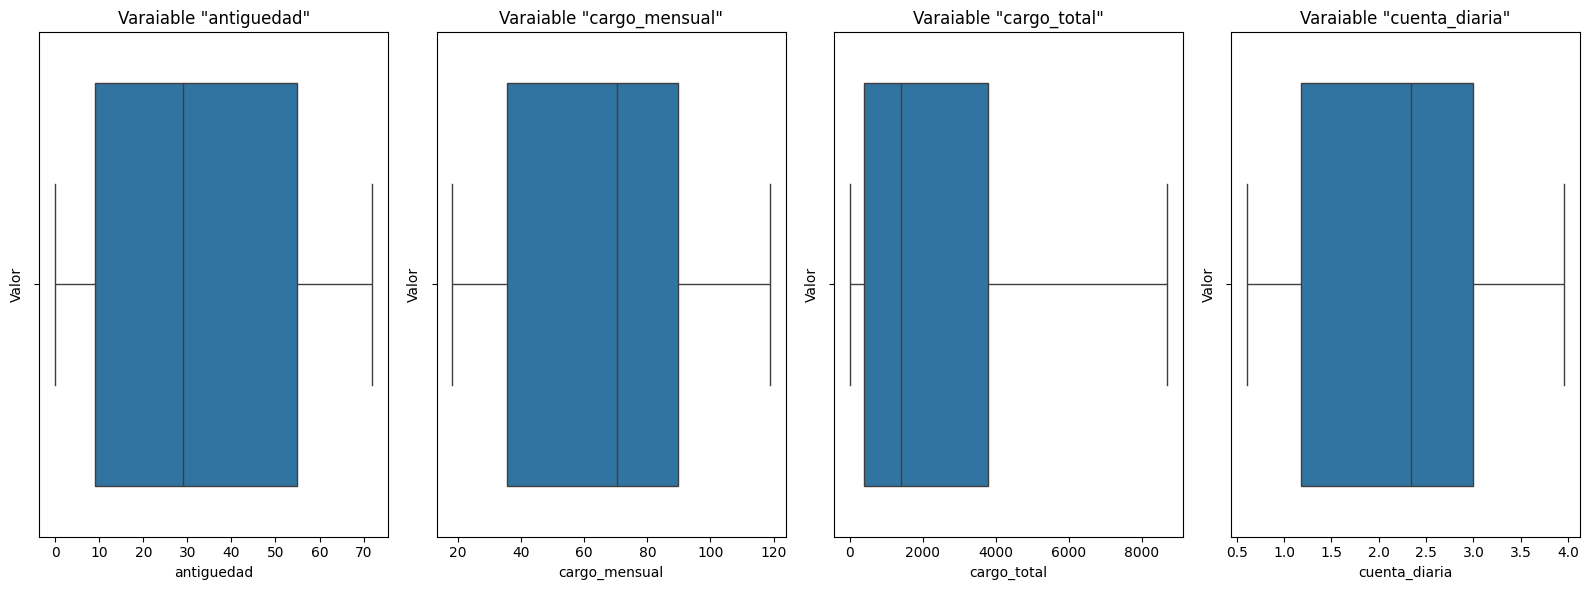

In [94]:
import mplcursors

#C√≥digo para boxplot.

# Supongamos que df es tu DataFrame y tienes las columnas 'var1', 'var2', 'var3', 'var4'
# que quieres graficar como boxplots

# Lista de las columnas que contienen los valores num√©ricos
variables = ['antiguedad', 'cargo_mensual', 'cargo_total', 'cuenta_diaria']

# Crear un lienzo con 4 subgr√°ficos (1 columna, 4 filas)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))

# Itera sobre las columnas y genera un boxplot para cada una
for i, var in enumerate(variables):
    sns.boxplot(x=df_telecomX_limpio[var], ax=axes[i])
    axes[i].set_title(f'Varaiable "{var}"')
    axes[i].set_ylabel('Valor')

    # Agregar interactividad para mostrar los datos al pasar el cursor
    mplcursors.cursor(axes[i], hover=True)

# Ajustar el layout para que los gr√°ficos no se sobrepongan
plt.tight_layout()

# Guardar la figura .
plt.savefig("boxplot_variables_numericas.png", dpi=300, bbox_inches='tight')

# Mostrar los gr√°ficos
plt.show()


##‚úèÔ∏è **An√°lisis Exploratoria (EDA).**

#####üè∑Ô∏è**Variable evasion.**

In [95]:

#C√≥digo para distribuci√≥n de frecuencia.
variables_categ√≥ricas = ['evasion', 'genero', 'a_mayor', 'pareja',
       'dependientes','telefonia', 'multilinea', 'internet',
       'seguridad', 'respaldo', 'proteccion', 'soporte', 'tv', 'peliculas',
       'contrato', 'factura_online', 'm_pago','cargo_total']

#Contiene la distribuci√≥n de frecuencia de cada variable categ√≥rica.
frecuencia_variable_categorica = {}

for col in variables_categ√≥ricas:
  frecuencia = df_telecomX_limpio[col].value_counts()
  participacion = df_telecomX_limpio[col].value_counts(normalize=True)  # para ver % participaci√≥n
  frecuencia_variable_categorica[col] = pd.concat([frecuencia,participacion],axis=1)


In [96]:
#C√≥digo  para calcular distribuci√≥n de frecuencia absoluta y relativa para la columna evasi√≥n.
print(f"üî¢ Distribuci√≥n de Frecuencia Absoluta y Relativa para Variable 'Evasion'.\n")
df_telecomX_limpio['evasion'].astype(str).str.replace('yes','si',regex=True)

frecuencia_variable_categorica['evasion'].columns = ['Absoluta','Relativa']
v_desersion = frecuencia_variable_categorica['evasion']
display(v_desersion)



üî¢ Distribuci√≥n de Frecuencia Absoluta y Relativa para Variable 'Evasion'.



Absoluta  Relativa
evasion                    
no           5174   0.73463
si           1869   0.26537

In [97]:
# Reemplazar 'yes' por 'si' en la columna 'evasion' (si es necesario)
df_telecomX_limpio['evasion'] = df_telecomX_limpio['evasion'].astype(str).str.replace('yes', 'si', regex=True)


# Crear gr√°fico de barras con Plotly usando los datos de v_desersion
fig = go.Figure()

# Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
    x=v_desersion.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
    y=v_desersion['Absoluta'],  # Usar la frecuencia absoluta de v_desersion
    marker_color=['green', 'blue'],  # Colores para las categor√≠as
))

# Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
    title="Frecuencia Absoluta Variable 'Evasion'.",
    xaxis_title='Categor√≠as de Evasi√≥n',
    yaxis_title='Frecuencia Absoluta',
    bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
    width=800,   # Ajustar el tama√±o de la figura
    height=400,  # Ajustar la altura
    xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
)


#Guardar imagen interactiva.
fig.write_html("grafico_evasion.html", include_plotlyjs="cdn")

# Mostrar el gr√°fico
fig.show()


#####üè∑Ô∏è**Variables Num√©ricas.**

###### **Distribuci√≥n de Frecuencia.**

In [98]:
##Recalculando datos en columna cargo_total.
df_telecomX_limpio.columns

Index(['id_cliente', 'evasion', 'genero', 'a_mayor', 'pareja', 'dependientes',
       'antiguedad', 'telefonia', 'multilinea', 'internet', 'seguridad',
       'respaldo', 'proteccion', 'soporte', 'tv', 'peliculas', 'contrato',
       'factura_online', 'm_pago', 'cargo_mensual', 'cargo_total',
       'cuenta_diaria'],
      dtype='object')

In [99]:
df_telecomX_limpio['evasion'].unique()

array(['no', 'si'], dtype=object)

In [100]:
# Resumen estad√≠stico por grupo de evasi√≥n.
df_telecomX_limpio.groupby('evasion')['antiguedad'].describe()


count       mean        std  min   25%   50%   75%   max
evasion                                                           
no       5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
si       1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

In [101]:
df_telecomX_limpio_copy = df_telecomX_limpio.copy()
df_telecomX_limpio_copy['evasion'] = df_telecomX_limpio_copy['evasion'].map({'si': 1, 'no': 0})
display(df_telecomX_limpio_copy.describe())

evasion   antiguedad  cargo_mensual  cargo_total  cuenta_diaria
count  7043.000000  7043.000000    7043.000000  7043.000000    7043.000000
mean      0.265370    32.371149      64.761692  2279.734304       2.158723
std       0.441561    24.559481      30.090047  2266.794470       1.003002
min       0.000000     0.000000      18.250000     0.000000       0.608333
25%       0.000000     9.000000      35.500000   398.550000       1.183333
50%       0.000000    29.000000      70.350000  1394.550000       2.345000
75%       1.000000    55.000000      89.850000  3786.600000       2.995000
max       1.000000    72.000000     118.750000  8684.800000       3.958333

In [102]:
# Resumen estad√≠stico por grupo de evasi√≥n.
resumen = df_telecomX_limpio_copy.groupby('evasion')['antiguedad'].describe()
#Lista para variables num√©ricas.
variables_numericas = ['antiguedad', 'cargo_mensual', 'cargo_total', 'cuenta_diaria']


def resumen_estadistico(df, columna):
    resumen = df.groupby('evasion')[columna].describe()

    # Calcular IQR en meses y a√±os.
    resumen['IQR'] = resumen['75%'] - resumen['25%']

    media_meses = resumen.loc[0,'mean'] - resumen.loc[1,'mean']
    media_a√±os = media_meses / 12

    medianas_meses = resumen.loc[0,'50%'] - resumen.loc[1,'50%']

    print(f"üü° Resumen estad√≠stico para evasion vs {col}.\n")
    display(resumen)
    print(f"\n‚úèÔ∏è Diferencia de medias: {media_meses:.2f} \n")
    print(f"‚úèÔ∏è Diferencia de medianas: {medianas_meses:.2f} \n\n\n")


for col in variables_numericas:
  resumen_estadistico(df_telecomX_limpio_copy, col)


üü° Resumen estad√≠stico para evasion vs antiguedad.



count       mean        std  min   25%   50%   75%   max   IQR
evasion                                                                 
0        5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0  46.0
1        1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0  27.0


‚úèÔ∏è Diferencia de medias: 19.59 

‚úèÔ∏è Diferencia de medianas: 28.00 



üü° Resumen estad√≠stico para evasion vs cargo_mensual.



count       mean        std    min    25%     50%   75%     max  \
evasion                                                                     
0        5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75   
1        1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35   

           IQR  
evasion         
0        63.30  
1        38.05


‚úèÔ∏è Diferencia de medias: -13.18 

‚úèÔ∏è Diferencia de medianas: -15.22 



üü° Resumen estad√≠stico para evasion vs cargo_total.



count         mean          std    min    25%       50%      75%  \
evasion                                                                      
0        5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
1        1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

             max      IQR  
evasion                    
0        8672.45  3689.95  
1        8684.80  2196.80


‚úèÔ∏è Diferencia de medias: 1018.12 

‚úèÔ∏è Diferencia de medianas: 975.98 



üü° Resumen estad√≠stico para evasion vs cuenta_diaria.



count      mean       std       min       25%     50%       75%  \
evasion                                                                     
0        5174.0  2.042171  1.036422  0.608333  0.836667  2.1475  2.946667   
1        1869.0  2.481378  0.822202  0.628333  1.871667  2.6550  3.140000   

              max       IQR  
evasion                      
0        3.958333  2.110000  
1        3.945000  1.268333


‚úèÔ∏è Diferencia de medias: -0.44 

‚úèÔ∏è Diferencia de medianas: -0.51 





######**Boxplots.**

In [104]:
import plotly.express as px

# Boxplot horizontal: x = num√©rica, y = categ√≥rica
fig = px.box(
    df_telecomX_limpio_copy,
    x='antiguedad',          # antes estaba en y
    y='evasion',             # antes estaba en x
    color='evasion',
    orientation='h',         # fuerza orientaci√≥n horizontal
    title='Boxplot de Antig√ºedad por Evasi√≥n (0: No, 1: S√≠)',
    labels={'evasion': 'Evasi√≥n', 'antiguedad': 'Antig√ºedad (meses)'},
    color_discrete_map={0: 'green', 1: 'blue'}  # usa 0 y 1 si tu columna es num√©rica
)

# (Opcional) Asegurar orden 0 -> 1 en el eje Y
fig.update_yaxes(categoryorder='array', categoryarray=[0, 1])

# Tama√±o de la figura
fig.update_layout(width=900, height=400)

# Guardar y mostrar
fig.write_html("grafico_evasion_vs_antiguedad_horizontal.html", include_plotlyjs="cdn")
fig.show()


In [139]:
#Gr√°fico para evasi√≥n vs cargo mensual.
# Boxplot horizontal: x = num√©rica, y = categ√≥rica
fig = px.box(
    df_telecomX_limpio_copy,
    x='cargo_mensual',          # antes estaba en y
    y='evasion',             # antes estaba en x
    color='evasion',
    orientation='h',         # fuerza orientaci√≥n horizontal
    title='Boxplot de Cargo Mensual por Evasi√≥n (0: No, 1: S√≠)',
    labels={'evasion': 'Evasi√≥n', 'cargo_mensual': 'Cargo Mensual'},
    color_discrete_map={0: 'green', 1: 'blue'}  # usa 0 y 1 si tu columna es num√©rica
)

# (Opcional) Asegurar orden 0 -> 1 en el eje Y
fig.update_yaxes(categoryorder='array', categoryarray=[0, 1])

# Tama√±o de la figura
fig.update_layout(width=900, height=400)

# Guardar y mostrar
fig.write_html("grafico_evasion_vs_CMensual_horizontal.html", include_plotlyjs="cdn")
fig.show()


In [137]:
#Gr√°fico para evasi√≥n vs cargo total.
# Boxplot horizontal: x = num√©rica, y = categ√≥rica
fig = px.box(
    df_telecomX_limpio_copy,
    x='cargo_total',          # antes estaba en y
    y='evasion',             # antes estaba en x
    color='evasion',
    orientation='h',         # fuerza orientaci√≥n horizontal
    title='Boxplot de Cargo Total por Evasi√≥n (0: No, 1: S√≠)',
    labels={'evasion': 'Evasi√≥n', 'cargo_total': 'Cargo Total'},
    color_discrete_map={0: 'green', 1: 'blue'}  # usa 0 y 1 si tu columna es num√©rica
)

# (Opcional) Asegurar orden 0 -> 1 en el eje Y
fig.update_yaxes(categoryorder='array', categoryarray=[0, 1])

# Tama√±o de la figura
fig.update_layout(width=900, height=400)

# Guardar y mostrar
fig.write_html("grafico_evasion_vs_CTotal_horizontal.html", include_plotlyjs="cdn")
fig.show()


In [138]:
#Gr√°fico para evasi√≥n vs cargo diario.
# Boxplot horizontal: x = num√©rica, y = categ√≥rica
fig = px.box(
    df_telecomX_limpio_copy,
    x='cuenta_diaria',          # antes estaba en y
    y='evasion',             # antes estaba en x
    color='evasion',
    orientation='h',         # fuerza orientaci√≥n horizontal
    title='Boxplot de Cargo Diario por Evasi√≥n (0: No, 1: S√≠)',
    labels={'evasion': 'Evasi√≥n', 'cuenta_diaria': 'Cargo Diario'},
    color_discrete_map={0: 'green', 1: 'blue'}  # usa 0 y 1 si tu columna es num√©rica
)

# (Opcional) Asegurar orden 0 -> 1 en el eje Y
fig.update_yaxes(categoryorder='array', categoryarray=[0, 1])

# Tama√±o de la figura
fig.update_layout(width=900, height=400)

# Guardar y mostrar
fig.write_html("grafico_evasion_vs_CDiario_horizontal.html", include_plotlyjs="cdn")
fig.show()


######**Tendencia general evasi√≥n con variables num√©ricas.**


* Evasion vs antiguedad.

‚úîÔ∏è Patr√≥n fuerte.

  Los clientes m√°s recientes tienen m√°s probabilidad de evadir, mientras que los clientes con m√°s tiempo en la compa√±√≠a tienden a permanecer.

* Evasion vs cargo_mensual.

‚úîÔ∏è  Patr√≥n fuerte.

Los clientes que no han desertado (0) tienden a tener facturas mensuales m√°s bajas en promedio, pero con una mayor variabilidad en los cargos. Esto podr√≠a indicar que el grupo incluye tanto a clientes con planes bajos como a algunos con planes m√°s altos.

Los clientes que han desertado (1), por otro lado, tienden a tener facturas mensuales m√°s altas y m√°s homog√©neas, lo que podr√≠a ser un indicio de que los clientes que pagan m√°s por sus servicios son m√°s propensos a desertar.

* Evasion vs cargo_total.

‚úîÔ∏è  Patr√≥n fuerte.

Clientes no evasores, acumulan montos elevados por la influencia del tiempo facturando en la empresa. Clientes evasores en corto tiempo han acumulado montos totales con diferencias corta  975 y siendo que solo representan el 26.53% del universo de clientes.

Las diferencias entre sus medianas refuerzan la idea que clientes que permanecen han acumulado m√°s que los evasores por factor tiempo, pero que la diferencia acumulada no es tan grande reforzando la idea que los clientes que evaden acumulan m√°s en menos tiempo por que pagan m√°s.

* Evasion vs cuenta_diaria.

‚úîÔ∏è Patr√≥n fuerte.

Clientes que evaden con en promedio de cargos diarios mayor a los clientes que no evaden. Afirma la hipotesis que los clientes que evaden pobablemente tienen contratos m√°s cortos o cancelan su servicio por obtener menor valor a un mismo precio.

#####üè∑Ô∏è**Variables Categ√≥ricas.**

######**Distribuci√≥n de Frecuencia.**

In [108]:
#c√≥digo para generar crosstab.
#Lista con variables categoricas para comparar distribuci√≥n con la variable evasi√≥n.

variables_categ√≥ricas = ['genero', 'a_mayor', 'pareja',
       'dependientes','telefonia', 'multilinea', 'internet',
       'seguridad', 'respaldo', 'proteccion', 'soporte', 'tv', 'peliculas',
       'contrato', 'factura_online', 'm_pago']

#Diccionario para guardar resumen de frecuencias por variables.
frecuencia_variable_categorica = {}

#Declaro funci√≥n para construir crosstab.
def crosstab_churn(df, col_cat, col_target, margins_name="Total"):
    # 1) Tabla de conteos absolutos con fila y columna Total
    tabla_abs = pd.crosstab(
        df[col_cat],
        df[col_target],
        margins=True,
        margins_name=margins_name
    )

    # 2) Detectar columnas reales del target (excluir columna de totales)
    cols_target = [c for c in tabla_abs.columns if c != margins_name]

    # 3) Calcular % por fila solo para las columnas reales del target
    tabla_pct = tabla_abs[cols_target].div(
        tabla_abs[cols_target].sum(axis=1), axis=0
    ) * 100

    # 4) Agregar columnas de %
    for col in cols_target:
        tabla_abs[f"{col} (%)"] = tabla_pct[col].round(2)

    # 5) Agregar columna de verificaci√≥n de suma de %
    tabla_abs["Suma %"] = tabla_abs[[f"{col} (%)" for col in cols_target]].sum(axis=1).round(2)

    return tabla_abs

for col in variables_categ√≥ricas:

  tabla = crosstab_churn(df_telecomX_limpio, col, 'evasion')
  frecuencia_variable_categorica[col] = tabla
  (f"üî¢ Distribuci√≥n evasion vs {col}.\n")
  display(tabla)
  print(f'\n\n')

evasion    no    si  Total  no (%)  si (%)  Suma %
genero                                            
female   2549   939   3488   73.08   26.92   100.0
male     2625   930   3555   73.84   26.16   100.0
Total    5174  1869   7043   73.46   26.54   100.0

evasion    no    si  Total  no (%)  si (%)  Suma %
a_mayor                                           
no       4508  1393   5901   76.39   23.61   100.0
si        666   476   1142   58.32   41.68   100.0
Total    5174  1869   7043   73.46   26.54   100.0

evasion    no    si  Total  no (%)  si (%)  Suma %
pareja                                            
no       2441  1200   3641   67.04   32.96   100.0
si       2733   669   3402   80.34   19.66   100.0
Total    5174  1869   7043   73.46   26.54   100.0

evasion         no    si  Total  no (%)  si (%)  Suma %
dependientes                                           
no            3390  1543   4933   68.72   31.28   100.0
si            1784   326   2110   84.55   15.45   100.0
Total         5174  1869   7043   73.46   26.54   100.0

evasion      no    si  Total  no (%)  si (%)  Suma %
telefonia                                           
no          512   170    682   75.07   24.93   100.0
si         4662  1699   6361   73.29   26.71   100.0
Total      5174  1869   7043   73.46   26.54   100.0

evasion             no    si  Total  no (%)  si (%)  Suma %
multilinea                                                 
no                2541   849   3390   74.96   25.04   100.0
no phone service   512   170    682   75.07   24.93   100.0
si                2121   850   2971   71.39   28.61   100.0
Total             5174  1869   7043   73.46   26.54   100.0

evasion        no    si  Total  no (%)  si (%)  Suma %
internet                                              
dsl          1962   459   2421   81.04   18.96   100.0
fiber-optic  1799  1297   3096   58.11   41.89   100.0
no           1413   113   1526   92.60    7.40   100.0
Total        5174  1869   7043   73.46   26.54   100.0

evasion                no    si  Total  no (%)  si (%)  Suma %
seguridad                                                     
no                   2037  1461   3498   58.23   41.77   100.0
no internet service  1413   113   1526   92.60    7.40   100.0
si                   1724   295   2019   85.39   14.61   100.0
Total                5174  1869   7043   73.46   26.54   100.0

evasion                no    si  Total  no (%)  si (%)  Suma %
respaldo                                                      
no                   1855  1233   3088   60.07   39.93   100.0
no internet service  1413   113   1526   92.60    7.40   100.0
si                   1906   523   2429   78.47   21.53   100.0
Total                5174  1869   7043   73.46   26.54   100.0

evasion                no    si  Total  no (%)  si (%)  Suma %
proteccion                                                    
no                   1884  1211   3095   60.87   39.13   100.0
no internet service  1413   113   1526   92.60    7.40   100.0
si                   1877   545   2422   77.50   22.50   100.0
Total                5174  1869   7043   73.46   26.54   100.0

evasion                no    si  Total  no (%)  si (%)  Suma %
soporte                                                       
no                   2027  1446   3473   58.36   41.64   100.0
no internet service  1413   113   1526   92.60    7.40   100.0
si                   1734   310   2044   84.83   15.17   100.0
Total                5174  1869   7043   73.46   26.54   100.0

evasion                no    si  Total  no (%)  si (%)  Suma %
tv                                                            
no                   1868   942   2810   66.48   33.52   100.0
no internet service  1413   113   1526   92.60    7.40   100.0
si                   1893   814   2707   69.93   30.07   100.0
Total                5174  1869   7043   73.46   26.54   100.0

evasion                no    si  Total  no (%)  si (%)  Suma %
peliculas                                                     
no                   1847   938   2785   66.32   33.68   100.0
no internet service  1413   113   1526   92.60    7.40   100.0
si                   1914   818   2732   70.06   29.94   100.0
Total                5174  1869   7043   73.46   26.54   100.0

evasion     no    si  Total  no (%)  si (%)  Suma %
contrato                                           
anual     1307   166   1473   88.73   11.27   100.0
bianual   1647    48   1695   97.17    2.83   100.0
mensual   2220  1655   3875   57.29   42.71   100.0
Total     5174  1869   7043   73.46   26.54   100.0

evasion           no    si  Total  no (%)  si (%)  Suma %
factura_online                                           
no              2403   469   2872   83.67   16.33   100.0
si              2771  1400   4171   66.43   33.57   100.0
Total           5174  1869   7043   73.46   26.54   100.0

evasion                          no    si  Total  no (%)  si (%)  Suma %
m_pago                                                                  
cargo-automatico-cta-bancaria  1286   258   1544   83.29   16.71   100.0
cargo-automatico-tc            1290   232   1522   84.76   15.24   100.0
cheque-electronico             1294  1071   2365   54.71   45.29   100.0
cheque-por-correo              1304   308   1612   80.89   19.11   100.0
Total                          5174  1869   7043   73.46   26.54   100.0

######üî∑ **Interpretaci√≥n Distribuci√≥n de Variables categ√≥ricas Respecto a la Variable Evasi√≥n.**


* G√©nero ‚Äì Posible candidata a eliminar ‚Äì Distribuci√≥n muy similar en ambas clases de churn (diferencia de evasi√≥n de 0.76 pp), lo que sugiere baja influencia predictiva.

* a_mayor ‚Äì Relevante ‚Äì Diferencia notable en la tasa de evasi√≥n entre categor√≠as (adultos mayores: 41.68%, no adultos mayores: 23.61%), con una brecha de 18.07 pp, lo que indica fuerte asociaci√≥n con la cancelaci√≥n.

* pareja ‚Äì Relevante ‚Äì Diferencia importante en la tasa de evasi√≥n entre categor√≠as (sin pareja: 32.96%, con pareja: 19.66%), con una brecha de 13.30 pp, lo que indica una asociaci√≥n significativa con la cancelaci√≥n.

* dependientes ‚Äì Relevante ‚Äì Diferencia significativa en la tasa de evasi√≥n entre categor√≠as (sin dependientes: 31.28%, con dependientes: 15.45%), con una brecha de 15.83 pp, lo que indica fuerte asociaci√≥n con la cancelaci√≥n.

* telefon√≠a ‚Äì Relevante (estrat√©gico) ‚Äì La diferencia en la tasa de evasi√≥n entre categor√≠as es peque√±a (24.93% vs 26.71%, brecha de 1.78 pp), pero se mantiene en el modelo por su relevancia estrat√©gica como producto principal de la empresa y por el potencial valor en interacciones con otras variables.

* multilinea ‚Äì Posible candidata a eliminar (redundante con telefon√≠a) ‚Äì Subdivisi√≥n de ‚Äútelefon√≠a‚Äù (no phone service ‚â° ‚Äúno‚Äù); diferencia peque√±a entre 1 o varias l√≠neas (+3.57); riesgo de redundancia/multicolinealidad.

* internet ‚Äì Relevante ‚Äì Diferencias marcadas en la tasa de evasi√≥n seg√∫n tipo de servicio. Brechas fibra vs DSL 22.93 pp; fibra vs sin internet 34.49 pp. Indica fuerte asociaci√≥n con la cancelaci√≥n, no debe eliminarse.

* seguridad ‚Äì Relevante ‚Äì Entre los clientes que tienen servicios de internet, quienes tienen servicios de seguridad o no tienen una diferencia marcada(27.16 pp). La categor√≠a no internet service tiene evasi√≥n 7.40% en concordancia con quienes no tienen servicio de internet en la variable internet lo cual genera riesgo de redundancia/multicolinealidad. Variable depende de servicio de internet probable funcione como marcador de tipo de plan/combinaci√≥n de servicios m√°s que como efecto causal directo.

* respaldo ‚Äì Relevante ‚Äì Entre clientes con internet, la breta es de 18.40 pp, diferencia marcada. La categor√≠a ‚Äúno internet service‚Äù presenta 7.40%, consistente con quienes no tienen internet lo cual genera riesgo de redundancia/multicolinealidad. Variable depende de servicio de internet probable funcione como marcador de tipo de plan/combinaci√≥n de servicios m√°s que como efecto causal directo.

* protecci√≥n ‚Äì Relevante ‚Äì Entre clientes con internet, la brecha es de 16.63 pp, diferencia marcada. La categor√≠a ‚Äúno internet service‚Äù es 7.40%, consistente con quienes no tienen internet lo cual genera riesgo de redundancia/multicolinealidad. Variable depende de servicio de internet probable funcione como marcador de tipo de plan/combinaci√≥n de servicios m√°s que como efecto causal directo.

* soporte ‚Äì Relevante ‚Äì Entre clientes con internet, la brecha es de 26.47 pp, diferencia marcada. La categor√≠a ‚Äúno internet service‚Äù es 7.40%, consistente con quienes no tienen internet lo cual genera riesgo de redundancia/multicolinealidad. Variable depende de servicio de internet probable funcione como marcador de tipo de plan/combinaci√≥n de servicios m√°s que como efecto causal directo.

* tv ‚Äì Requiere prueba en el modelo ‚Äì  Entre clientes con internet, la brecha es de 3.45 pp, efecto d√©bil/moderado. La categor√≠a ‚Äúno internet service‚Äù es 7.40%, consistente con quienes no tienen internet lo cual genera riesgo de redundancia/multicolinealidad. Variable depende de servicio de internet probable funcione como marcador de tipo de plan/combinaci√≥n de servicios m√°s que como efecto.

* pel√≠culas ‚Äì Requiere prueba en el modelo ‚Äì Entre clientes con internet,brecha 3.74 pp, efecto d√©bil/moderado. La categor√≠a ‚Äúno internet service‚Äù es 7.40%, consistente con quienes no tienen internet lo cual genera riesgo de redundancia/multicolinealidad. Variable depende de servicio de internet probable funcione como marcador de tipo de plan/combinaci√≥n de servicios m√°s que como efecto.

* contrato  ‚Äì Relevante ‚Äì Tasas de evasi√≥n muy dispares seg√∫n contrato Brechas: mensual vs anual 31.44 pp; mensual vs bianual 39.88 pp.  Fuerte asociaci√≥n con la cancelaci√≥n (contratos de mayor plazo muestran menor evasi√≥n). Nota/Riesgo: probable correlaci√≥n con antig√ºedad y con la composici√≥n del plan (posible redundancia/colinealidad). No implica causalidad directa.

* factura_online   ‚Äì Relevante ‚Äì Diferencia marcada en la tasa de evasi√≥n:17.24 pp fuerte asociaci√≥n con la cancelaci√≥n. Nota/Riesgo: probable correlaci√≥n con tipo de contrato (mensual) y con la composici√≥n del plan/servicios (p. ej., tipo de internet), por lo que podr√≠a funcionar como marcador de adopci√≥n digital m√°s que causalidad directa; considerar posible redundancia con variables relacionadas.

* m_pago ‚Äî Relevante ‚Äî Tasas de evasi√≥n muy dispares seg√∫n m√©todo de pago:Brecha m√°xima 30.05 pp lo que sugiere fuerte asociaci√≥n con la cancelaci√≥n. Nota/Riesgo: probable correlaci√≥n con tipo de contrato (mensual) y con adopci√≥n digital (p. ej., factura_online), por lo que podr√≠a existir redundancia con variables relacionadas.

---

######üîπ  **Distribuci√≥n evasion vs adulto mayor.**


In [109]:
df_a_mayor = pd.DataFrame(frecuencia_variable_categorica['a_mayor'])

# Crear gr√°fico de barras para a_mayor.
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_a_mayor.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_a_mayor['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF7F00','#FF4F79'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable adulto mayor.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de Adulto Mayor',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )


#Guardar imagen interactiva.
fig.write_html("grafico_a_mayor.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()

---

######üîπ  **Distribuci√≥n evasion vs pareja.**

In [110]:
df_pareja = pd.DataFrame(frecuencia_variable_categorica['pareja'])

# Crear gr√°fico de barras para
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_pareja.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_pareja['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF7F00','#FF4F79'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable pareja.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de Pareja',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )

#Guardar imagen interactiva.
fig.write_html("grafico_pareja.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()

---

######üîπ  **Distribuci√≥n evasion vs dependientes.**

In [111]:
df_dependientes = pd.DataFrame(frecuencia_variable_categorica['dependientes'])

# Crear gr√°fico de barras para dependientes.
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_dependientes.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_dependientes['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF7F00','#FF4F79'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable dependientes.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de Dependientes',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )

#Guardar imagen interactiva.
fig.write_html("grafico_dependientes.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()

---

######üîπ**Distribuci√≥n evasion vs telefonia.**


In [112]:
df_dependientes = pd.DataFrame(frecuencia_variable_categorica['telefonia'])

# Crear gr√°fico de barras para dependientes.
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_dependientes.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_dependientes['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF7F00','#FF4F79'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable telefonia.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de telefonia',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )

#Guardar imagen interactiva.
fig.write_html("grafico_telefonia.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()

######üîπ  **Distribuci√≥n evasion vs internet.**


In [113]:
df_internet = pd.DataFrame(frecuencia_variable_categorica['internet'])

# Crear gr√°fico de barras para internet.
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_internet.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_internet['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF4F79', '#FF7F00','#8B4513'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable internet.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de Internet',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )

#Guardar imagen interactiva.
fig.write_html("grafico_internet.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()


---

######üîπ  **Distribuci√≥n evasion vs seguridad.**

In [114]:
df_seguridad = pd.DataFrame(frecuencia_variable_categorica['seguridad'])

# Crear gr√°fico de barras para seguridad.
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_seguridad.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_seguridad['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF7F00','#8B4513','#FF4F79'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable seguridad.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de Seguridad',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )

#Guardar imagen interactiva.
fig.write_html("grafico_seguridad.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()


---

######üîπ  **Distribuci√≥n evasion vs respaldo.**

In [115]:
df_respaldo = pd.DataFrame(frecuencia_variable_categorica['respaldo'])

# Crear gr√°fico de barras para respaldo
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_respaldo.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_respaldo['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF7F00','#8B4513','#FF4F79'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable respaldo.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de Respaldo',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )


#Guardar imagen interactiva.
fig.write_html("grafico_respaldo.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()


---

######üîπ  **Distribuci√≥n evasion vs proteccion.**

In [116]:
df_proteccion = pd.DataFrame(frecuencia_variable_categorica['proteccion'])

# Crear gr√°fico de barras para protecci√≥n.
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_proteccion.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_proteccion['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF7F00','#8B4513','#FF4F79'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable protecci√≥n.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de Protecci√≥n',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )

#Guardar imagen interactiva.
fig.write_html("grafico_proteccion.html", include_plotlyjs="cdn")


  # Mostrar el gr√°fico
fig.show()


---

######üîπ  **Distribuci√≥n evasion vs soporte.**

In [117]:
df_soporte = pd.DataFrame(frecuencia_variable_categorica['soporte'])

# Crear gr√°fico de barras para variable contrato.
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_soporte.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_soporte['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF7F00', '#8B4513','#FF4F79'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable 'soporte'.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de Soporte.',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )

#Guardar imagen interactiva.
fig.write_html("grafico_soporte.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()


---
######üîπ  **Distribuci√≥n evasion vs tv.**

In [118]:
df_soporte = pd.DataFrame(frecuencia_variable_categorica['tv'])

# Crear gr√°fico de barras para variable contrato.
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_soporte.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_soporte['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF7F00', '#8B4513','#FF4F79'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable 'tv'.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de tv.',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )

#Guardar imagen interactiva.
fig.write_html("grafico_tv.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()


---
######üîπ  **Distribuci√≥n evasion vs peliculas.**

In [119]:
df_contrato = pd.DataFrame(frecuencia_variable_categorica['peliculas'])

# Crear gr√°fico de barras para variable contrato.
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_contrato.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_contrato['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF7F00', '#8B4513','#FF4F79'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable 'peliculas'.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de pel√≠culas.',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )


#Guardar imagen interactiva.
fig.write_html("grafico_peliculas.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()




---


######üîπ  **Distribuci√≥n evasion vs contrato.**

In [120]:
df_contrato = pd.DataFrame(frecuencia_variable_categorica['contrato'])

# Crear gr√°fico de barras para variable contrato.
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_contrato.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_contrato['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF4F79', '#8B4513','#FF7F00'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable 'contrato'.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de Contrato.',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )


#Guardar imagen interactiva.
fig.write_html("grafico_contrato.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()


---

######üîπ  **Distribuci√≥n evasion vs factura_online.**

In [121]:
df_factura_online = pd.DataFrame(frecuencia_variable_categorica['factura_online'])

# Crear gr√°fico de barras para factura_online
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_factura_online.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_factura_online['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#FF4F79','#FF7F00'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable factura_online.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de Factura Online.',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )

#Guardar imagen interactiva.
fig.write_html("grafico_factura_online.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()

---

######üîπ  **Distribuci√≥n evasion vs m_pago.**



In [122]:
df_m_pago = pd.DataFrame(frecuencia_variable_categorica['m_pago'])

# Crear gr√°fico de barras para m_pago.
fig = go.Figure()

  # Agregar barras a la figura usando la frecuencia absoluta almacenada en v_desersion
fig.add_trace(go.Bar(
      x=df_m_pago.index,  # Usar el √≠ndice como las categor√≠as de 'evasion'
      y=df_m_pago['si'].drop('Total'),  # Usar la frecuencia absoluta de v_desersion
      marker_color=['#00BFFF','#8B4513','#FF7F00','#FF4F79'],  # Colores para las categor√≠as
  ))

  # Ajustar la figura para reducir la separaci√≥n entre las barras manteniendo el mismo grosor
fig.update_layout(
      title="Frecuencia absoluta para deserci√≥n seg√∫n variable m_pago.",
      #title_font=dict(size=24, family='Arial', color='black', weight='bold', align='center'),
      xaxis_title='Categor√≠as de Cargo Mensual',
      yaxis_title='Frecuencia Absoluta',
      bargap=0.4,  # Espacio entre las barras, ajustado para que est√©n m√°s juntas
      width=800,   # Ajustar el tama√±o de la figura
      height=400,  # Ajustar la altura
      xaxis=dict(tickangle=0),  # Alineaci√≥n de las etiquetas en el eje X
  )

#Guardar imagen interactiva.
fig.write_html("grafico_m_pago.html", include_plotlyjs="cdn")

  # Mostrar el gr√°fico
fig.show()

##‚úèÔ∏è An√°lisis de Correlaci√≥n de Variables.

#####üè∑Ô∏è**Variables Num√©ricas.**

In [123]:
#Datos para la correlaci√≥n.
#Lista para variables num√©ricas.
variables_numericas = ['antiguedad', 'cargo_mensual', 'cargo_total', 'cuenta_diaria']
#df con datos de evasi√≥n alfanum√©ricos.
df_telecomX_limpio_copy['evasion'].unique()

array([0, 1])

In [124]:
from scipy.stats import pointbiserialr

**An√°lisis de Coeficiente:**
--

- \> 0 ‚Üí a mayor valor de la variable num√©rica, m√°s probabilidad de evasi√≥n.

- \< 0 ‚Üí a mayor valor de la variable num√©rica, menos probabilidad de evasi√≥n.

- Cerca de 0 ‚Üí casi sin relaci√≥n.

**P-valor:**
--

- Si p_valor < 0.05 ‚Üí la correlaci√≥n es estad√≠sticamente significativa (hay evidencia de que existe relaci√≥n).

- Si p_valor ‚â• 0.05 ‚Üí la relaci√≥n podr√≠a ser casual.

In [125]:
#C√≥digo para realizar an√°lisis de correlaci√≥n evasi√≥n vs variables num√©ricas.
resultados = []
for var in variables_numericas:
    coef, p_valor = pointbiserialr(df_telecomX_limpio_copy["evasion"], df_telecomX_limpio_copy[var])

    # Asignar emoji seg√∫n direcci√≥n
    if coef > 0.05:
        emoji = "üìà"  # relaci√≥n positiva
    elif coef < -0.05:
        emoji = "üìâ"  # relaci√≥n negativa
    else:
        emoji = "‚ûñ"  # relaci√≥n casi nula

    resultados.append({
        "Variable": var,
        "Coeficiente": coef,        # valor original
        "P-valor": p_valor,         # valor original
        "Significativo": "‚úÖ" if p_valor < 0.05 else "‚ùå",
        "Tendencia": emoji
    })

# Crear DataFrame de resultados
resultados_df = pd.DataFrame(resultados)

# Formato visual
resultados_df["Coeficiente"] = resultados_df["Coeficiente"].map(lambda x: f"{x:.3f}")
resultados_df["P-valor"] = resultados_df["P-valor"].map(lambda x: f"{x:.5f}")
print(f'üìå An√°lisis de Correlaci√≥n de Variables "evasi√≥n" y "variables num√©ricas".\n')
display(resultados_df)


üìå An√°lisis de Correlaci√≥n de Variables "evasi√≥n" y "variables num√©ricas".



Variable Coeficiente  P-valor Significativo Tendencia
0     antiguedad      -0.352  0.00000             ‚úÖ         üìâ
1  cargo_mensual       0.193  0.00000             ‚úÖ         üìà
2    cargo_total      -0.198  0.00000             ‚úÖ         üìâ
3  cuenta_diaria       0.193  0.00000             ‚úÖ         üìà

**Interpretaci√≥n:**

* **Evasi√≥n vs Antig√ºedad.**
  Relaci√≥n inversa, a menor valor de antiguedad del cliente mayor es la probabilidad que deje la empresa.

* **Evasi√≥n vs Cargo Mensual.**
  Relaci√≥n directa, a mayor valor en el cargo mensual mayor la probabilidad que el cliente deje la empresa.

* **Evasi√≥n vs Cargo Total.**
  Relaci√≥n inversa, a mayor valor en el cargo total en el cliente menor es la probabilidad que deja la empresa.

* **Evasi√≥n vs Cuenta Diaria.**
  Relaci√≥n directa, a mayor valor en el cargo diario del cliente mayor es la probabilidad que deje la empresa.

**Interpretaci√≥n**

- Para todas la variables num√©ricas es poco probable que el resultado observado sea producto del azar, por lo que tenemos evidencia para decir que probablemente s√≠ existe una relaci√≥n.

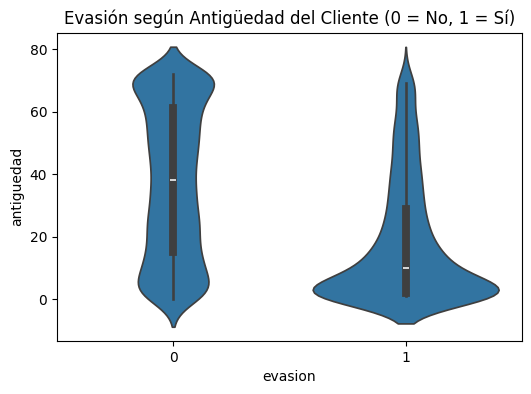

In [126]:
# variable "antiguedad"

plt.figure(figsize=(6,4))
sns.violinplot(x="evasion", y="antiguedad", data=df_telecomX_limpio_copy)
plt.title(f"Evasi√≥n seg√∫n Antig√ºedad del Cliente (0 = No, 1 = S√≠)")
plt.show()


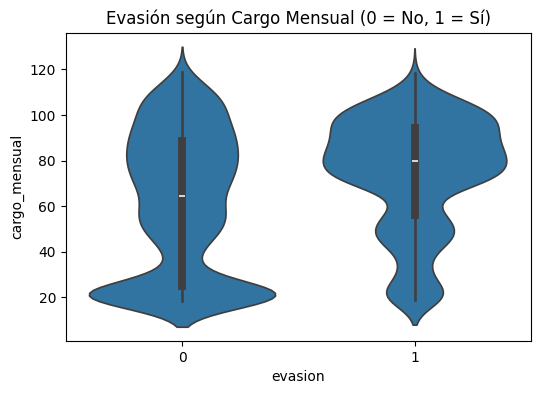

In [127]:
#Variable "cargo_mensual"

plt.figure(figsize=(6,4))
sns.violinplot(x="evasion", y="cargo_mensual", data=df_telecomX_limpio_copy)
plt.title(f"Evasi√≥n seg√∫n Cargo Mensual (0 = No, 1 = S√≠)")
plt.show()


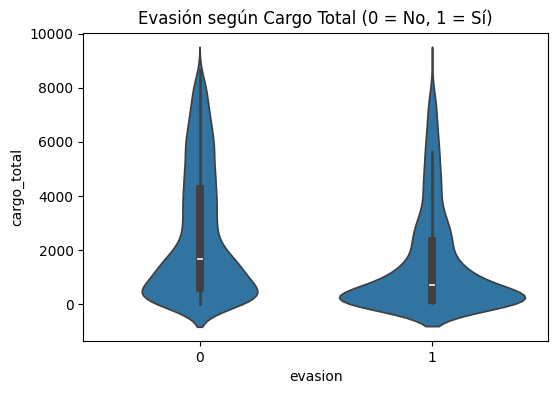

In [128]:
#Variable "cargo_total"

plt.figure(figsize=(6,4))
sns.violinplot(x="evasion", y="cargo_total", data=df_telecomX_limpio_copy)
plt.title(f"Evasi√≥n seg√∫n Cargo Total (0 = No, 1 = S√≠)")
plt.show()


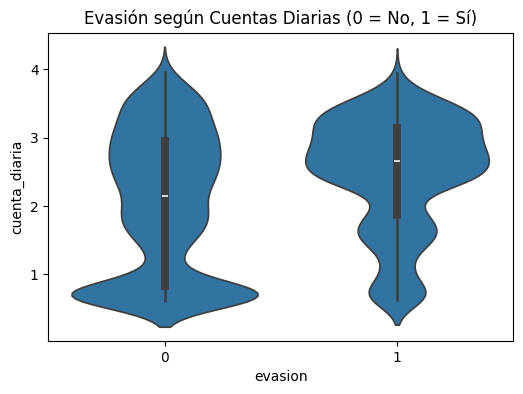

In [129]:
#Variable "cuenta_diaria"

plt.figure(figsize=(6,4))
sns.violinplot(x="evasion", y="cuenta_diaria", data=df_telecomX_limpio_copy)
plt.title(f"Evasi√≥n seg√∫n Cuentas Diarias (0 = No, 1 = S√≠)")
plt.show()


#####üè∑Ô∏è**Variables Categ√≥ricas.**

**An√°lisis de Chi-cuadrado de independencia.**
--

Sirve para saber si hay relaci√≥n estad√≠stica entre dos variables categ√≥ricas.

No mide ‚Äúdirecci√≥n‚Äù como la correlaci√≥n, pero s√≠ te dice si hay dependencia.

**Interpretaci√≥n:**

- p-valor < 0.05 ‚Üí hay relaci√≥n significativa.

- p-valor ‚â• 0.05 ‚Üí no hay evidencia de relaci√≥n.

**Cramer‚Äôs V (opcional)**
--
Mide la fuerza de la relaci√≥n entre 0 y 1:

| Valor V de Cramer | Interpretaci√≥n |
| ----------------- | -------------- |
| **0.00 ‚Äì 0.10**   | Muy d√©bil      |
| **>0.10 ‚Äì 0.25**  | D√©bil          |
| **>0.25 ‚Äì 0.50**  | Moderada       |
| **>0.50**         | Fuerte         |


In [130]:
from scipy.stats import chi2_contingency

In [131]:
# Lista para guardar resultados
resultados = []

def etiqueta_intensidad(v):
    if pd.isna(v):
        return 'N/A'
    if v <= 0.10:
        return 'Muy d√©bil'
    elif v <= 0.25:
        return 'D√©bil'
    elif v <= 0.50:
        return 'Moderada'
    else:
        return 'Fuerte'

for var, tabla in frecuencia_variable_categorica.items():
    # 1) Filtrar solo filas/columnas con conteos absolutos (quitar Totales y %)
    tabla_abs_sin_total = tabla.drop(index='Total', errors='ignore')
    tabla_abs_sin_total = tabla_abs_sin_total[
        [c for c in tabla_abs_sin_total.columns
         if not str(c).endswith('(%)') and c not in ('Suma %', 'Total')]
    ]

    # Si despu√©s de limpiar queda algo inv√°lido, saltar
    if tabla_abs_sin_total.empty or tabla_abs_sin_total.shape[0] < 1 or tabla_abs_sin_total.shape[1] < 1:
        resultados.append({
            'Variable': var,
            'Chi-cuadrado': np.nan,
            'P-valor': np.nan,
            'Significativo': '‚ùå',
            'Cramer_V': np.nan,
            'Intensidad': 'N/A'
        })
        continue

    # 2) Chi-cuadrado
    chi2, p, dof, expected = stats.chi2_contingency(tabla_abs_sin_total)

    # 3) Cramer's V (con resguardo si min(k-1, r-1) = 0)
    n = tabla_abs_sin_total.values.sum()
    r, k = tabla_abs_sin_total.shape
    denom = min(k - 1, r - 1)
    if denom <= 0 or n == 0:
        cramers_v_val = np.nan
    else:
        phi2 = chi2 / n
        cramers_v_val = np.sqrt(phi2 / denom)

    # 4) Guardar resultados (redondeo para mostrar, etiqueta seg√∫n valor sin redondear)
    resultados.append({
        'Variable': var,
        'Chi-cuadrado': None if pd.isna(chi2) else round(chi2, 3),
        'P-valor': p,
        'Significativo': '‚úÖ' if (pd.notna(p) and p < 0.05) else '‚ùå',
        'Cramer_V': None if pd.isna(cramers_v_val) else round(cramers_v_val, 3),
        'Intensidad': etiqueta_intensidad(cramers_v_val)
    })

# Convertir a DataFrame
resultados_df = pd.DataFrame(resultados)

# Formatear p-valor y ordenar por Cramer_V descendente (sin romper NaN)
resultados_df['P-valor'] = resultados_df['P-valor'].apply(lambda x: f"{x:.5f}" if pd.notna(x) else '')
resultados_df = resultados_df.sort_values(by='Cramer_V', ascending=False, na_position='last')

print('üìå An√°lisis de Correlaci√≥n de Variables "evasi√≥n" y "variables categ√≥ricas".\n')
display(resultados_df)


üìå An√°lisis de Correlaci√≥n de Variables "evasi√≥n" y "variables categ√≥ricas".



Variable  Chi-cuadrado  P-valor Significativo  Cramer_V Intensidad
13        contrato      1184.597  0.00000             ‚úÖ     0.410   Moderada
7        seguridad       849.999  0.00000             ‚úÖ     0.347   Moderada
10         soporte       828.197  0.00000             ‚úÖ     0.343   Moderada
6         internet       732.310  0.00000             ‚úÖ     0.322   Moderada
15          m_pago       648.142  0.00000             ‚úÖ     0.303   Moderada
8         respaldo       601.813  0.00000             ‚úÖ     0.292   Moderada
9       proteccion       558.419  0.00000             ‚úÖ     0.282   Moderada
11              tv       374.204  0.00000             ‚úÖ     0.231      D√©bil
12       peliculas       375.661  0.00000             ‚úÖ     0.231      D√©bil
14  factura_online       258.278  0.00000             ‚úÖ     0.191      D√©bil
3     dependientes       189.129  0.00000             ‚úÖ     0.164      D√©bil
1          a_mayor       159.426  0.00000             ‚úÖ     0.150      D√©bil
2           pareja       158.733  0.00000             ‚úÖ     0.150      D√©bil
5       multilinea        11.330  0.00346             ‚úÖ     0.040  Muy d√©bil
4        telefonia         0.915  0.33878             ‚ùå     0.011  Muy d√©bil
0           genero         0.484  0.48658             ‚ùå     0.008  Muy d√©bil

**Interpretaci√≥n:**

- Observamos que con excepci√≥n de las variables 'genero' y 'telefonia', la mayor√≠a de variables categoricas cuenta con evidencia estad√≠stica para decir que se asocian con la evasi√≥n de clientes y que son dependientes sin implicar causalidad. Si no que la distribuci√≥n de la variable evasi√≥n cambia seg√∫n el resto de las categor√≠as. Y conocer los datos de estas variables me ayudar√°n a entender el fen√≥meno de la evasi√≥n.

- Respecto a la intensidad de la relaci√≥n de dependencia destacan con mayor valor : contrato, seguridad, soporte, m_pago e internet pero ubicandose en un nivel de intensidad moderada alta, en t√©rminos generales.

- Respecto a la variable multil√≠nea si bien tiene evidencia estad√≠stica, la intensidad de la relaci√≥n es muy d√©bil por lo que no aportaria valor al modelo.

---
#üìÑ**Informe final: An√°lisis de Evasi√≥n de Clientes TELECOM X LATAM.**

![banner informe final](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/banner%20de%20informe.png)

##1Ô∏è‚É£ Introducci√≥n.

TelecomX LATAM empresa de servicios telef√≥nicos enfrente un preocupante fen√≥meno: los clientes que cancelan sus servicios est√° aumentando.   Este fen√≥meno impacta directamente en la rentabilidad y el crecimiento de la empresa.  Para abordar el desaf√≠o hemos colaborado realizando un exhaustivo an√°lisis con el objetivo de identificar de manera preliminar los factores que influyen en la desersi√≥n de sus clientes.   El an√°lisis es parte de un Challenge de Data Science, en el que se pretende aplicar t√©nicas aprendidas referente al ETL (Extracci√≥n, Transformaci√≥n y Carga) para preparar los datos, y se han desarrollado visualizaciones estrat√©gicas para reconocer patrones y tendencias. La meta es proporcionar insight clave que puedan ser utilizados por el equipo de Telecom X LATAM para dise√±ar modelos predictivos y estrat√©gias efectivas para reducir la tasa de evasi√≥n y mejorar la retenci√≥n de los clientes.

##2Ô∏è‚É£ Metodolog√≠a.

* Extracci√≥n de Datos.

 Los datos fueron obtenidos de la API de TelecomX LATAM, a trav√©s de un archivo JSON que conten√≠a informaci√≥n esencial sobre los clientes. Este inclu√≠a datos demogr√°ficos, detalles sobre el tipo de servicio de contrato (telefon√≠a, internet, u otros) y el estado de evasi√≥n de cada cliente. La API proporcion√≥ un acceso eficiente y estructurado a esta informaci√≥n, permitiendo una extracci√≥n completa y precisa de los datos relevantes para el an√°lisis.

* Transformaci√≥n de Datos.

  Los datos fueron transformados para ser utilizados en el an√°lisis. Visualizamos datos anidados por lo que normalizamos su contenido. Esto incluy√≥ la normalizaci√≥n de datos para facilitar su comparaci√≥n, la conversi√≥n de algunas variables a formatos adecuados y la imputaci√≥n de valores faltantes. Se generaron variables adicionales como la antig√ºedad de los clientes y categor√≠as basadas en sus servicios contratados, a fin de segmentar mejor la informaci√≥n.


* An√°lisis Exploratorio de Datos (EDA)

  Con la ayuda de la biblioteca pandas entre otras generamos preliminarmente un an√°lisis descriptivo de las variables num√©ricas para explorar el comportamiento individual. Luego generamos crosstaba para comprender la distribuci√≥n absoluta y relativa de las variables de inter√©s enfocandonos en encontrar patrones sugirieran correlaci√≥n significativa.

* Visualizaci√≥n Estrat√©gica.

  Se desarrollaron visualizaciones detalladas para representar la distribuci√≥n. Esto incluy√≥ boxplots y gr√°ficos de barras, para ayudar a visualizar la relaci√≥n entre cada variable num√©rica y categ√≥rica con la tasa de evasi√≥n, as√≠ como los posibles factores de riesgo asociados.

* Generaci√≥n de Insights.

  A partir de las tablas de frecuencia y las visualizaciones generadas, se extranjeron insights claves sobre los factores que pod√≠an estar contribuyendo a la evasi√≥n de clientes. Los hallazgos fueron resumidos y clasificados. Y con ellos extragimos un patr√≥n global y recomendamos su uso para el modelado de predictivo y estrat√©gias enfocadas en mejorar la retenci√≥n de clientes.

* Carga de Datos.

  

## 3Ô∏è‚É£ **Resumen de Hallazgos.**

###üîµ **EDA: Frecuencia Absoluta y Relativa para Variable Evasi√≥n.**

| Evasi√≥n | Frecuencia (abs.) | Frecuencia relativa |
|---|---:|---:|
| No | 5,174 | 73.46% |
| S√≠ | 1,869 | 26.54% |

Gr√°fico 1.

![Gr√°fico 1](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/variable_evasion.png)



[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_evasion.html)


---

###üîµ **EDA: Hallazgos significativos ‚Äî Variables categ√≥ricas.**



####üü¢ **Relevante para el Modelo.**

| Variable                      | Justificaci√≥n                                                                                                                                               |
| ----------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **a\_mayor**                  | Adultos mayores **41.68%** vs no adultos mayores **23.61%** (brecha **18.07 pp**): fuerte asociaci√≥n con la cancelaci√≥n.                                    |
| **pareja**                    | Sin pareja **32.96%** vs con pareja **19.66%** (brecha **13.30 pp**): asociaci√≥n significativa.                                                             |
| **dependientes**              | Sin dependientes **31.28%** vs con dependientes **15.45%** (brecha **15.83 pp**): fuerte asociaci√≥n.                                                        |
| **telefon√≠a** *(estrat√©gico)* | 24.93% (no) vs **26.71%** (s√≠), brecha **1.78 pp**; se mantiene por relevancia del producto y posibles interacciones.                                       |
| **internet**                  | Fibra **41.89%**, DSL **18.96%**, sin internet **7.40%**; brechas grandes (fibra‚ÄìDSL **22.93 pp**, fibra‚Äìsin internet **34.49 pp**).                        |
| **contrato**                  | Mensual **42.71%**, anual **11.27%**, bianual **2.83%**; brechas **31.44** y **39.88 pp**. Riesgo: correlaci√≥n con **antig√ºedad** y composici√≥n del plan.   |
| **factura\_online**           | No **16.33%** vs s√≠ **33.57%** (brecha **17.24 pp**); posible marcador de adopci√≥n digital. Riesgo de redundancia con **contrato/m√©todo de pago/internet**. |
| **m\_pago**                   | Cheque-electr√≥nico **45.29%** vs cargo autom√°tico TC **15.24%** (brecha m√°x. **30.05 pp**). Riesgo: correlaci√≥n con **contrato** y **factura\_online**.     |



> **Interpretaci√≥n:** porcentajes se refieren a la tasa de **evasi√≥n** (s√≠). Marcamos ‚Üë cuando la tasa est√° claramente **por sobre** el promedio (26.54%) y ‚Üì cuando est√° **por debajo**.
>
> **Nota:** los servicios adicionales (seguridad, respaldo, protecci√≥n, soporte) suelen **co-var√≠ar** con el tipo de plan/Internet; deben interpretarse como **marcadores** m√°s que como causa directa.

**Variables Muy Fuertes (Œî ‚â• 10 pp)**

| Variable | Categor√≠a (riesgo) | Evasi√≥n (%) | Se√±al | Observaci√≥n |
|---|---|---:|:--:|---|
| **Internet** | **fiber-optic** | **41.89%** | ‚Üë | Mayor riesgo; **DSL 18.96%** (‚Üì) y **sin internet 7.40%** (‚Üì‚Üì). |
| **Contrato** | **mensual** | **42.71%** | ‚Üë | Contratos **anual 11.27%** y **bianual 2.83%** reducen fuertemente. |
| **m_pago** | **cheque-electronico** | **45.29%** | ‚Üë | Auto d√©bito (cuenta 16.71%, TC 15.24%) y cheque por correo 19.11% ‚Üì. |
| **a_mayor** | **s√≠** | **41.68%** | ‚Üë | Adultos mayores con mayor evasi√≥n que no mayores (23.61%). |
| **Pareja** | **no** | **32.96%** | ‚Üë | Con pareja 19.66% (‚Üì). |
| **Dependientes** | **no** | **31.28%** | ‚Üë | Con dependientes 15.45% (‚Üì). |
| **Factura online** | **s√≠** | **33.57%** | ‚Üë | Sin factura online 16.33% (‚Üì). |
| **Telefon√≠a** | **s√≠** | **26.71%** | ‚Üë | Sin servicio de telefon√≠a 24.93% (‚Üì). | Variable estrat√©gica/ principal producto de la empresa.


**Moderadas (5‚Äì10 pp).**

---

Gr√°fico 2.

![Gr√°fico 2 Variable Internet](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/variable%20internet.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_internet.html)


---


Gr√°fico 3.


![Gr√°fico 3 Variable Contrato](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/variable%20contrato.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_contrato.html)

---


Gr√°fico 4.

![Gr√°fico 4 Variable Soporte](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/variable%20soporte.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_soporte.html)

---

Gr√°fico 5.

![Gr√°fico 5 Variable Seguridad](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/variable%20seguridad.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_seguridad.html)


---

Gr√°fico 6.

![Gr√°fico 6 Variable Respaldo](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/respaldo.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_respaldo.html)

---

Gr√°fico 7.

![Gr√°fico 7 Variable Proteccion](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/variableProteccion.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_proteccion.html)

---

Gr√°fico 8.

![Gr√°fico 8 Variable m pago](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/variable%20mpago.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_m_pago.html)


---

Gr√°fico 9.

![Gr√°fico 9 Variable a mayor](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/adulto_mayor.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_a_mayor.html)


---

Gr√°fico 10.

![Gr√°fico 10 Variable Pareja](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/variable%20pareja.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_pareja.html)


---

Gr√°fico 11.

![Gr√°fico 11 Variable Dependiente](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/variable%20dependiente.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_dependientes.html)

---

Gr√°fico 12.

![Gr√°fico 12 Variable Factura Online](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/variable%20factura%20online.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_factura_online.html)

---

Gr√°fico 13.

![Gr√°fico 13 Variable telefon√≠a](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/telefonia.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_telefonia.html)

---

####üü° **Requiere Prueba en el Modelo.**

| Variable      | Justificaci√≥n                                                                                                                                        |
| ------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| **multilinea** | Subdivisi√≥n de **telefon√≠a** (*no phone service* ‚â° ‚Äúno‚Äù en telefon√≠a); diferencia peque√±a entre 1 o varias l√≠neas; **riesgo de redundancia/colinealidad** con **telefon√≠a**. |
| **tv**        | (Con internet) sin brecha vs con **3.45 pp**: efecto d√©bil/moderado; posible redundancia con **internet** y otros servicios. |
| **peliculas** | (Con internet) sin brecha vs con **3.74 pp**: efecto d√©bil/moderado; posible redundancia con **internet** y otros servicios. |
| **Soporte** | (Con internet) sin vs con brecha **27.47pp** efecto alto; pero posible redundancia con **internet** y otros servicios. |
| **Seguridad** | (Con internet) sin brecha vs con **27.16 pp**  efecto alto; pero posible redundancia con **internet** y otros servicios. |
| **Respaldo** | (Con internet) sin brecha vs con **18.4 pp**  efecto alto; pero posible redundancia con **internet** y otros servicios. |
| **Protecci√≥n** | (Con internet) sin brecha vs con **16.63 pp**  efecto alto; pero posible redundancia con **internet** y otros servicios. |


**Variables Muy Fuertes (Œî ‚â• 10 pp)**

| Variable | Categor√≠a (riesgo) | Evasi√≥n (%) | Se√±al | Observaci√≥n |
|---|---|---:|:--:|---|
| **Soporte** | **no** | **41.64%** | ‚Üë | Con soporte **15.17%** (‚Üì). |
| **Seguridad** | **no** | **41.77%** | ‚Üë | Con seguridad **14.61%** (‚Üì). |
| **Respaldo** | **no** | **39.93%** | ‚Üë | Con respaldo **21.53%** (‚Üì). |
| **Protecci√≥n** | **no** | **39.13%** | ‚Üë | Con protecci√≥n **22.50%** (‚Üì). |

**Moderadas (5‚Äì10 pp).**

| Variable | Categor√≠a (riesgo) | Evasi√≥n (%) | Se√±al | Observaci√≥n |
|---|---|---:|:--:|---|
| **Telefon√≠a** | **s√≠** | **26.71%** | ‚Üë | Sin servicio telefon√≠a 24.93% (‚Üì). |

**D√©biles (< 5 pp).**


| Variable | Categor√≠a (riesgo) | Evasi√≥n (%) | Se√±al | Observaci√≥n |
|---|---|---:|:--:|---|
| **Multil√≠nea** | **s√≠** | **28.61%** | ‚Üë  | no (‚Üë) Ligeramente mayor que ‚Äúno multil√≠nea 25.04%‚Äù. |
| **TV** | no | 33.52% | ‚Üë | s√≠ (‚Üë) Diferencia baja y est√° condicionada por tener servicio de Internet. |
| **Pel√≠culas** | no | 33.68% | ‚Üë | si (‚Üë) Similar observaci√≥n que TV. |

---

####üî¥ **Candidata a Eliminar.**

| Variable      | Justificaci√≥n                                                                                                                                        |
| ------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| **G√©nero**     | Distribuci√≥n muy similar en ambas clases de churn (brecha **0.76 pp**): baja influencia predictiva.                                                                          |



**D√©biles (< 5 pp).**

| Variable | Categor√≠a (riesgo) | Evasi√≥n (%) | Se√±al | Observaci√≥n |
|---|---|---:|:--:|---|
| **G√©nero** | **female** | **26.92%** | ‚Üë | man (‚Üì) Ligeramente mayor que ‚Äúman 26.16%‚Äù. |

---

###üîµ**EDA: Hallazgos ‚Äî Variables num√©ricas.**

####üü¢ **Relevante para el Modelo.**


| Variable | No evaden (mean/median) | Evaden (mean/median) | Diferencias clave | Lectura |
|---|---|---|---|---|
| **Antig√ºedad (meses)** | 37.57 / 38 | 17.98 / 10 | **Œî medias = 19.59**, **Œî medianas = 28.00** | Los evasores son significativamente **m√°s nuevos**. |
| **Cargo mensual** | 61.27 / 64.43 | 74.44 / 79.65 | Œî medias = -13.18, Œî medianas = -15.22 | Evasores **pagan m√°s** al mes. |


> IQR (antig√ºedad): no evaden 46.0 vs evaden 27.0 ‚Üí menor dispersi√≥n en evasores, concentrados en baja antig√ºedad.

> IQR (cargo mensual): no evaden 63.30 vs evaden 38.05 ‚Üí distribuci√≥n de evasores m√°s concentrada en valores altos de cargo mensual. Menor dispersi√≥n en evasores.

---

####üü° **Requiere Prueba en el Modelo.**

| Variable | No evaden (mean/median) | Evaden (mean/median) | Diferencias clave | Lectura |
|---|---|---|---|---|
| **Cargo total acumulado** | 2549.91 / 1679.53 | 1531.80 / 703.55 | **Œî medianas = 975.98** | Menor acumulado coherente con **menor antig√ºedad**. |

>**Cargo Total.** Lecturas similares a la antig√ºedad del cliente. Podr√≠a significar redundancia con Antig√ºedad y Cargo mensual. Y tiene misma interpretabilidad. Pero no se sabe las variaciones en el precio de los servicios o planes del cliente.

---

####üî¥ **Candidata a Eliminar.**

| Variable | No evaden (mean/median) | Evaden (mean/median) | Diferencias clave | Lectura |
|---|---|---|---|---|
| **Cuenta diaria** | 2.04 / 2.15 | 2.48 / 2.66 | Œî medianas = -0.51 | Evasores con **mayor gasto diario**. |

>**Cuenta Diaria.** Su c√°lculo depende de los valores de cargo mensual. Redundancia evidente.

Gr√°fico 13.

![Gr√°fico 12 Boxplot variables num√©ricas](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/boxplot_variables_numericas.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo]()

---

Gr√°fico 14.

![Gr√°fico 14 Boxplot evasion antig√ºedad](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/boxplot_Antiguedad_horizontal.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_evasion_vs_antiguedad_horizontal.html)

---

Gr√°fico 15.

![Gr√°fico 14 Boxplot evasion antig√ºedad](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/boxplot_CMensual_horizontal.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_evasion_vs_CMensual_horizontal.html)

---

Gr√°fico 16.

![Gr√°fico 14 Boxplot evasion cargo total acumulado](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/boxplot_CTotal_horizontal.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_evasion_vs_CTotal_horizontal.html)

---

Gr√°fico 17.

![Gr√°fico 14 Boxplot evasion cuenta diaria](https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/Imagenes_TELECOMX_LATAM/boxplot_Cdiario_horizontal.png)

[Haz clic aqu√≠ para ver gr√°fico interactivo](https://eunicegarcia503.github.io/Challenge2_TelecomX_LATAM/Imagenes_TELECOMX_LATAM/grafico_evasion_vs_CDiario_horizontal.html)

---

###üîµ**Prueba de Independencia - Hallazgos.**

####üü¢ **Relevante para el Modelo.**

Moderada (V de Cram√©r > 0.25‚Äì0.50)

| Variable   | Chi-cuadrado | P-valor | Signif. | V de Cram√©r |
| ---------- | -----------: | :------ | :------ | ----------: |
| contrato   |     1184.597 | 0.00000 | ‚úÖ       |       0.410 |
| seguridad  |      849.999 | 0.00000 | ‚úÖ       |       0.347 |
| soporte    |      828.197 | 0.00000 | ‚úÖ       |       0.343 |
| internet   |      732.310 | 0.00000 | ‚úÖ       |       0.322 |
| m\_pago    |      648.142 | 0.00000 | ‚úÖ       |       0.303 |
| respaldo   |      601.813 | 0.00000 | ‚úÖ       |       0.292 |
| proteccion |      558.419 | 0.00000 | ‚úÖ       |       0.282 |

####üü° **Requiere Prueba en el Modelo.**

D√©bil (V de Cram√©r > 0.10‚Äì0.25)

| Variable        | Chi-cuadrado | P-valor | Signif. | V de Cram√©r |
| --------------- | -----------: | :------ | :------ | ----------: |
| tv              |      374.204 | 0.00000 | ‚úÖ       |       0.231 |
| peliculas       |      375.661 | 0.00000 | ‚úÖ       |       0.231 |
| factura\_online |      258.278 | 0.00000 | ‚úÖ       |       0.191 |
| dependientes    |      189.129 | 0.00000 | ‚úÖ       |       0.164 |
| a\_mayor        |      159.426 | 0.00000 | ‚úÖ       |       0.150 |
| pareja          |      158.733 | 0.00000 | ‚úÖ       |       0.150 |

####üî¥ **Candidata a Eliminar.**

Muy d√©bil (V de Cram√©r 0.00‚Äì0.10)

| Variable   | Chi-cuadrado | P-valor | Signif. | V de Cram√©r |
| ---------- | -----------: | :------ | :------ | ----------: |
| multilinea |       11.330 | 0.00346 | ‚úÖ       |       0.040 |
| telefonia  |        0.915 | 0.33878 | ‚ùå       |       0.011 |
| genero     |        0.484 | 0.48658 | ‚ùå       |       0.008 |

---

###üîµ**An√°lisis de Correlaci√≥n - Hallazgos.**

####üü¢**Relevante para el modelo.**

Alta probabilidad de evasi√≥n

>**Observaciones:**
Todas las variables poseen evidencia estadistica para determinar una relaci√≥n con la evaci√≥n sin embargo el CV nos confirma si esa relaci√≥n es fuerte o es casual.

| Variable   |    r   | P-valor | Signif. | Tendencia |
| ---------- | :----: | :-----: | :-----: | :-------: |
| antiguedad | -0.352 | 0.00000 |    ‚úÖ    |     üìâ    |


####üü° **Requiere prueba en el modelo.**

Mediana probabilidad de evasi√≥n

| Variable       |    r   | P-valor | Signif. | Tendencia |
| -------------- | :----: | :-----: | :-----: | :-------: |
| cargo\_mensual |  0.193 | 0.00000 |    ‚úÖ    |     üìà    |




####üî¥**Candidata a eliminar.**

La relaci√≥n puede ser casual

| Variable       |    r   | P-valor | Signif. | Tendencia |
| -------------- | :----: | :-----: | :-----: | :-------: |
| cuenta\_diaria |  0.193 | 0.00000 |    ‚úÖ    |     üìà    |
| cargo\_total   | -0.198 | 0.00000 |    ‚úÖ    |     üìâ    |


>**Nota:**
El CV de la variable cuenta diaria confirma que es una redundancia con la variable cargo mensual pues sus valores provienen de ella.

>**Nota:**
El CV de la variable cuenta cargo total es muy similar con el de cargo mensual porque cargo total es una cumulado de la facturaci√≥n de los clientes y su relaci√≥n es igual que la variable antig√ºedad porque su efecto domina. cargo_total casi siempre es ‚âà cargo_total x antiguedad (Con leves variaciones por cambios de planes y descuentos probablemente). Esto en el fondo hace que cuente la misma historia que antiguedad y cargo_mensual juntas. Esto significa redundancia y posible colinealidad en modelos lineales. Para √°rboles no rompe el modelo pero no aporta mucho y puede repartir importancias. Suele ser mejor quitarlo por claridad.

---


## 4Ô∏è‚É£ **Patr√≥n global propuesto para analizar la evasi√≥n de clientes.**


**Patr√≥n de alto riesgo** (asociaci√≥n, no causalidad): clientes con **Internet (especialmente fibra √≥ptica)**, **contrato mensual**, **sin servicios de valor agregado** (soporte/seguridad/respaldo/protecci√≥n), **factura online**, **pago con cheque electr√≥nico**, **menor antig√ºedad** y **mayor cargo mensual**. Adem√°s, perfiles **sin pareja**, **sin dependientes** y **adultos mayores** muestran mayor probabilidad de evasi√≥n.
Servicios de valor asociados un porcentaje de desersi√≥n pero se considera que en su asociaci√≥n al servicio de internet est√© la respuesta.

**Interpretaci√≥n sugerida:** El **tipo/presencia de Internet** aparece como eje dominante del patr√≥n; los servicios adicionales y algunas preferencias operativas (factura online, m√©todo de pago) act√∫an como **marcadores de plan**. La **menor antig√ºedad** y el **mayor cargo mensual** refuerzan la hip√≥tesis de que los evasores suelen pertenecer a **contratos recientes** y/o **planes menos competitivos**.

---

## 5Ô∏è‚É£ **C√≥mo usar este patr√≥n en tu modelo/acci√≥n.**

- **Segmentaci√≥n de riesgo** con reglas simples (perfil arriba).
- **Validaci√≥n** en an√°lisis multivariado (log√≠stica/√°rboles) para confirmar la contribuci√≥n neta de cada variable controlando por Internet y contrato.
- **Intervenciones**: ofertas a clientes en contrato mensual con fibra y alto cargo mensual; incluir soporte/seguridad como **bundles** y revisar m√©todo de pago.


---

In [132]:
"""
variables_numericas = ['antiguedad', 'cargo_mensual', 'cargo_total', 'cuenta_diaria']
#df con datos de evasi√≥n alfanum√©ricos.
df_telecomX_limpio_copy['evasion'].unique()
"""
print()

In [133]:
prueba_variable_ctotal = pd.DataFrame(df_telecomX_limpio_copy[['antiguedad', 'cargo_mensual', 'cargo_total']]).copy()
prueba_variable_ctotal['prueba'] = (prueba_variable_ctotal['antiguedad'] * prueba_variable_ctotal['cargo_mensual']).round(2)
display(prueba_variable_ctotal.head())

antiguedad  cargo_mensual  cargo_total  prueba
0           9           65.6       593.30   590.4
1           9           59.9       542.40   539.1
2           4           73.9       280.85   295.6
3          13           98.0      1237.85  1274.0
4           3           83.9       267.40   251.7

In [134]:
import numpy as np
import pandas as pd

df = df_telecomX_limpio_copy.copy()

# Producto simplificado (tu "prueba")
df['prueba'] = (df['antiguedad'] * df['cargo_mensual']).astype(float)

# Diferencias respecto del total real
df['delta'] = df['cargo_total'] - df['prueba']
df['pct_diff'] = np.where(df['cargo_total'] > 0, df['delta'] / df['cargo_total'], np.nan)

# M√©tricas de similitud
r_p = df[['cargo_total','prueba']].corr(method='pearson').iloc[0,1]
r_s = df[['cargo_total','prueba']].corr(method='spearman').iloc[0,1]
mape = df.loc[df['cargo_total']>0, 'pct_diff'].abs().mean()

share_5  = df['pct_diff'].abs().le(0.05).mean()   # |dif| ‚â§ 5%
share_10 = df['pct_diff'].abs().le(0.10).mean()  # |dif| ‚â§ 10%

print(f"Corr Pearson cargo_total vs prueba: {r_p:.3f} | Spearman: {r_s:.3f}")
print(f"MAPE (|delta|/cargo_total): {mape:.2%}")
print(f"Filas con |dif| ‚â§ 5%: {share_5:.1%} | ‚â§ 10%: {share_10:.1%}")


Corr Pearson cargo_total vs prueba: 1.000 | Spearman: 1.000
MAPE (|delta|/cargo_total): 3.21%
Filas con |dif| ‚â§ 5%: 80.4% | ‚â§ 10%: 94.4%


Pearson = 1.000 y Spearman = 1.000 ‚Üí pr√°cticamente id√©nticas: cuando una sube, la otra sube en la misma proporci√≥n.

MAPE = 3.21% ‚Üí en promedio, tu estimaci√≥n antiguedad * cargo_mensual se equivoca solo un 3.21% frente a cargo_total (muy poco).

80.4% de las filas tienen error ‚â§ 5% y 94.4% ‚â§ 10% ‚Üí en casi todos los clientes, el producto acierta casi exacto.

Conclusi√≥n
S√≠, se mantiene la hip√≥tesis: cargo_total ‚âà antiguedad √ó cargo_mensual. Son redundantes.

Qu√© hacer (para evitar colinealidad)
No uses juntas: cargo_total + antiguedad + cargo_mensual.

Opciones:

Quedarte con antiguedad y cargo_mensual y eliminar cargo_total (recomendado por interpretabilidad).

O usar solo cargo_total y quitar las otras dos (pierdes detalle/explicaci√≥n).

Si tienes cuenta_diaria (‚âÉ cargo_mensual/30), elim√≠nala si ya usas cargo_mensual.

Nota VIF: si incluyeras tambi√©n tu variable prueba (= producto), el VIF de cargo_total/prueba se dispara. Aunque no metas prueba al modelo, con estos n√∫meros ya est√° claro que sobra cargo_total (o el par antiguedad+cargo_mensual): elige uno de esos caminos, no ambos.

S√≠, esa es la idea. En corto:

Crea las dos columnas: arpu_hist y delta_arpu.

Evita usar juntos cargo_total + antiguedad + cargo_mensual (son redundantes).

En el modelo, usa un set sin colinealidad:

Receta recomendada
Lineales (log√≠stica/regresi√≥n) y tambi√©n √°rboles/boosting:

Usa: antiguedad, cargo_mensual, delta_arpu

No uses: cargo_total

No mezcles juntos: cargo_mensual + arpu_hist + delta_arpu (los 3 a la vez ‚Üí dependencia perfecta).
Si prefieres arpu_hist, entonces usa antiguedad, arpu_hist, delta_arpu y quita cargo_mensual.